
#Group by + giữ cột ít ảnh hưởng




## Chuẩn bị

In [ ]:
# https://drive.google.com/file/d/1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b/view?usp=drive_link
!gdown '1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b'

Downloading...
From: https://drive.google.com/uc?id=1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b
To: /content/Data_KNN_group_by.csv
100% 1.77M/1.77M [00:00<00:00, 12.1MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('Data_KNN_group_by.csv')

In [ ]:
# Các biến phân loại có ảnh hưởng tới lương:
# ['location', 'companyType', 'salaryType', 'contractType',
# 'jobType', 'experience', 'gender', 'education', 'Partner']
data = data.drop(['decription', 'index'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])

In [ ]:
import numpy as np
data['Salary'].replace(to_replace='Thỏa thuận',
                       value=np.nan,
                       inplace=True)
data=data.dropna()
data['Salary'] = list(data['Salary'].astype(float))

<ipython-input-5-2baf0f4c91c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'] = list(data['Salary'].astype(float))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold

## Huấn luyện

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 13
[LightGBM] [Info] Start training from score 15477505.184886
[

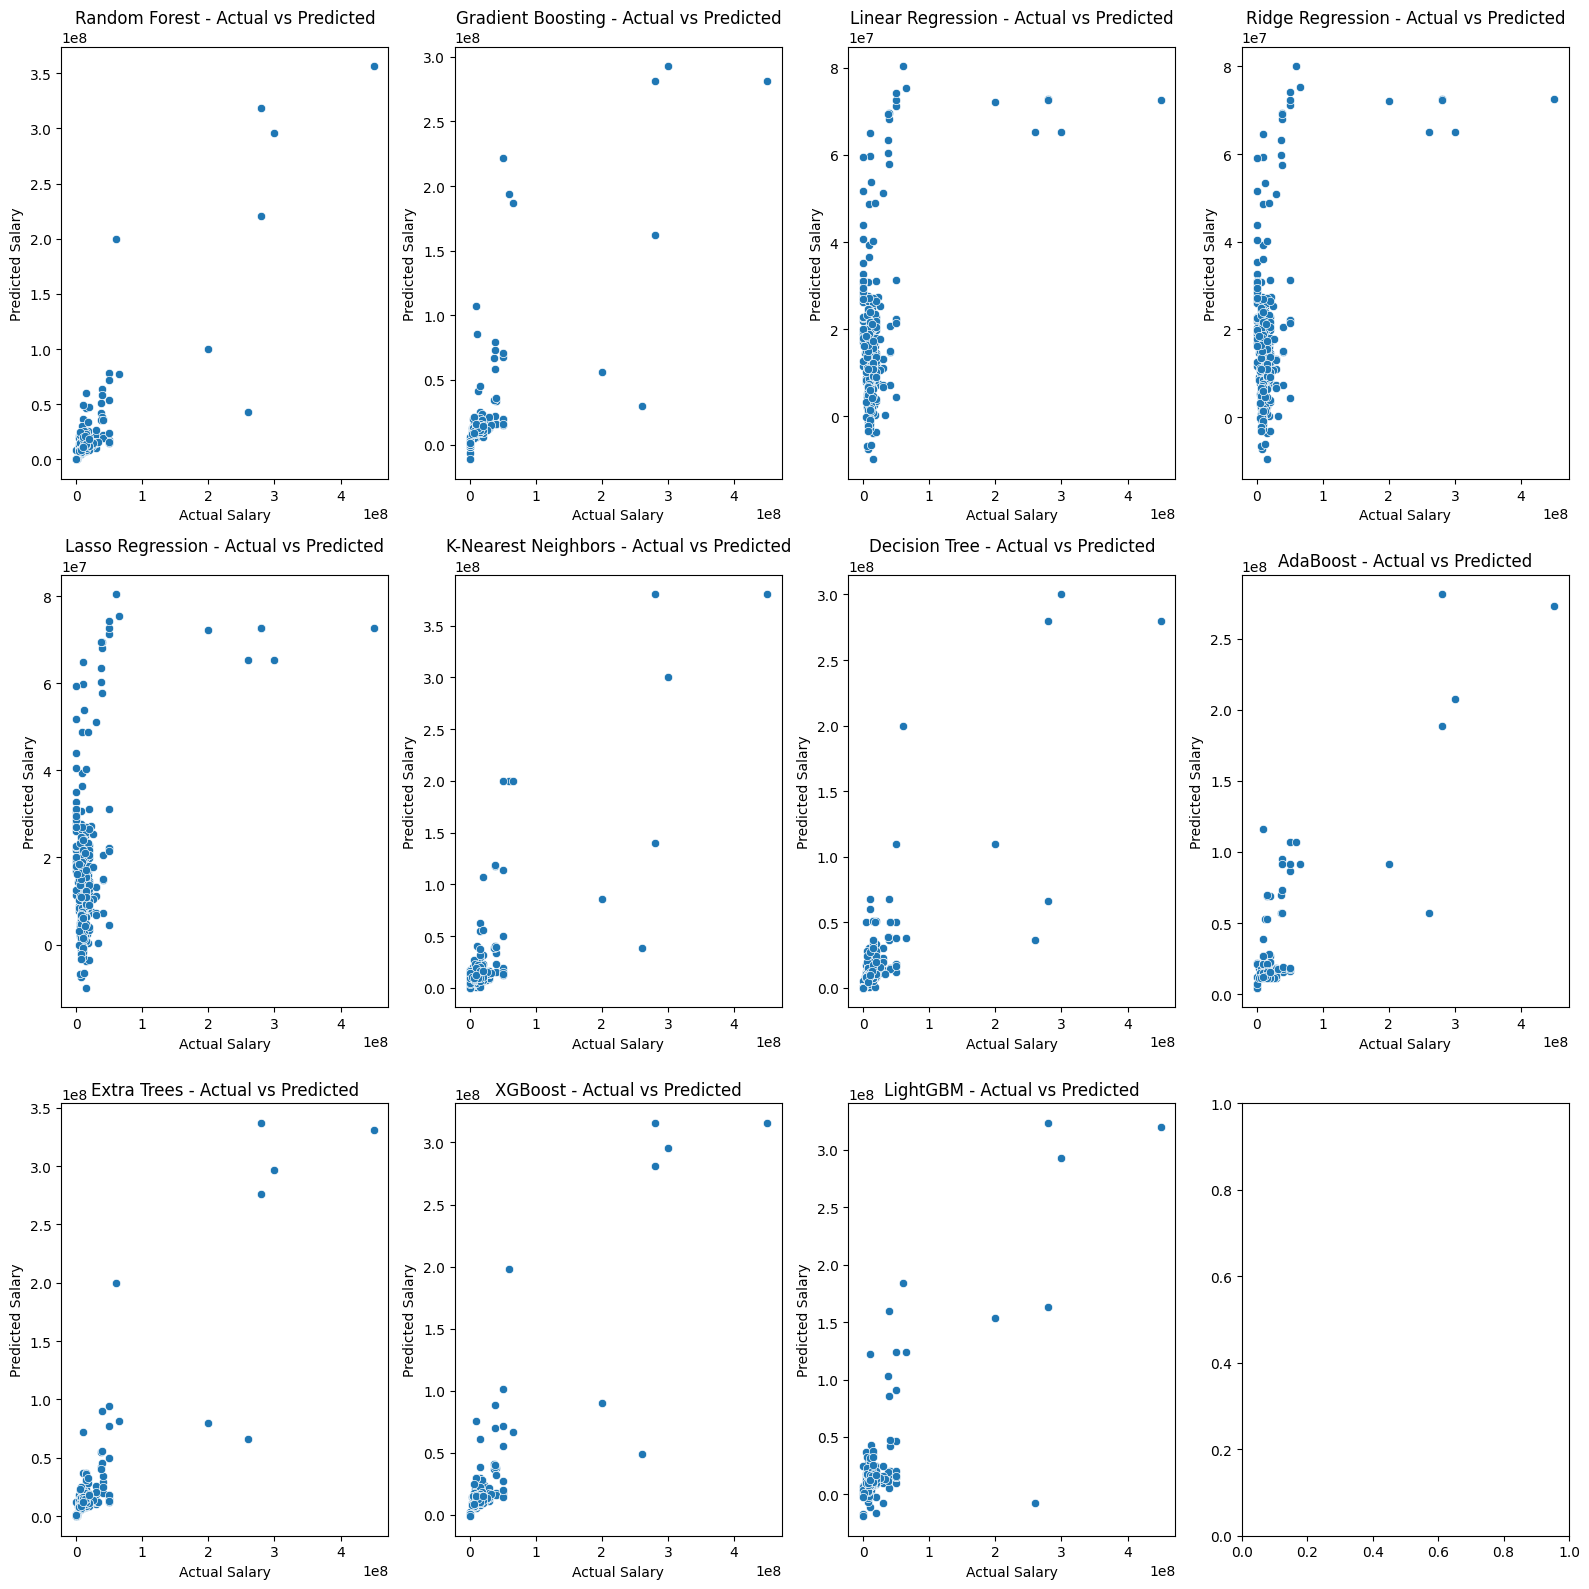

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    'Lasso Regression': {'alpha': [0.1, 1, 10], 'tol': [0.001, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_samples': [5, 10, 20]}
}

# K-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()

best_params = []
mses = []
r2s = []
model_names = []

# Grid Search và huấn luyện mô hình
for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    r2s.append(r2)

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name} - Actual vs Predicted')
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
info_model = {'Model': model_names, 'Best params': best_params, 'MSE': mses, 'R2': r2s}
info_model= pd.DataFrame(info_model)
info_model

,Model,Best params,MSE,R2
0,Random Forest,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",2.743198e+14,0.785533
1,Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",5.056489e+14,0.604676
2,Linear Regression,{},9.806523e+14,0.233311
3,Ridge Regression,"{'alpha': 10, 'solver': 'sparse_cg'}",9.809602e+14,0.233070
4,Lasso Regression,"{'alpha': 10, 'tol': 0.001}",9.806524e+14,0.233311
5,K-Nearest Neighbors,"{'algorithm': 'brute', 'n_neighbors': 3, 'weig...",4.914876e+14,0.615747
6,Decision Tree,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",4.489049e+14,0.649039
7,AdaBoost,"{'learning_rate': 0.2, 'n_estimators': 100}",3.843430e+14,0.699515
8,Extra Trees,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",2.755656e+14,0.784559
9,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",2.898336e+14,0.773404


# Group by + bỏ cột ít ảnh hưởng

## Chuẩn bị


In [ ]:
# https://drive.google.com/file/d/1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b/view?usp=drive_link
!gdown '1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b'

Downloading...
From: https://drive.google.com/uc?id=1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b
To: /content/Data_KNN_group_by.csv
100% 1.77M/1.77M [00:00<00:00, 12.8MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('Data_KNN_group_by.csv')

In [ ]:
# Các biến phân loại có ảnh hưởng tới lương:
# ['location', 'companyType', 'salaryType', 'contractType',
# 'jobType', 'experience', 'gender', 'education', 'Partner']
data = data.drop(['decription', 'index', 'minAge', 'maxAge', 'vacacies', 'skill'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])

In [ ]:
import numpy as np
data['Salary'].replace(to_replace='Thỏa thuận',
                       value=np.nan,
                       inplace=True)
data=data.dropna()
data['Salary'] = list(data['Salary'].astype(float))

<ipython-input-13-2baf0f4c91c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'] = list(data['Salary'].astype(float))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold

## Huấn luyện

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

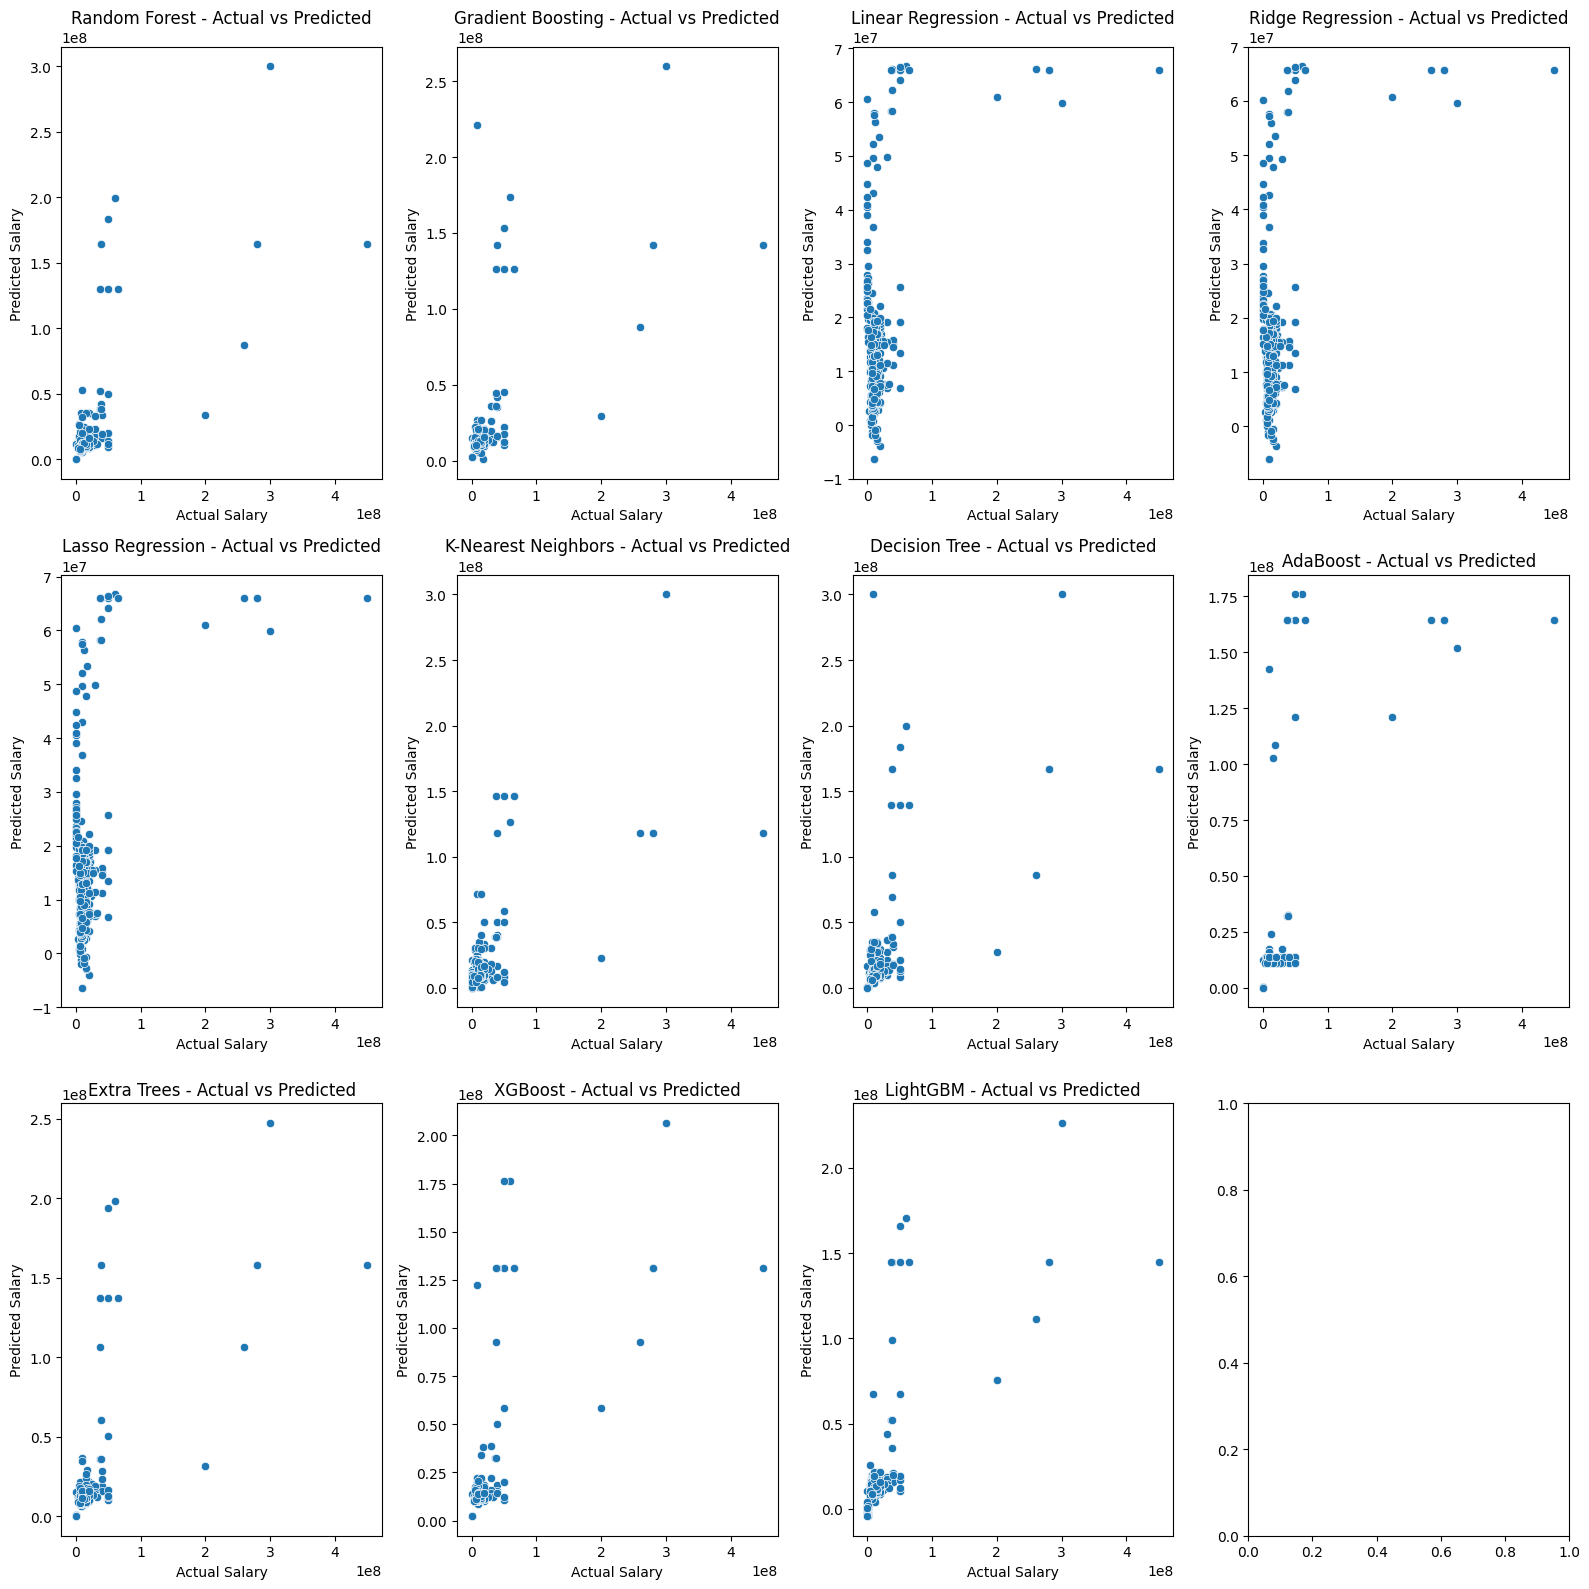

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    'Lasso Regression': {'alpha': [0.1, 1, 10], 'tol': [0.001, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_samples': [5, 10, 20]}
}


# K-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()

best_params = []
mses = []
r2s = []
model_names = []

# Grid Search và huấn luyện mô hình
for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    r2s.append(r2)

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name} - Actual vs Predicted')
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
info_model = {'Model': model_names, 'Best params': best_params, 'MSE': mses, 'R2': r2s}
info_model= pd.DataFrame(info_model)
info_model

,Model,Best params,MSE,R2
0,Random Forest,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",6.090282e+14,0.523852
1,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",7.209335e+14,0.436363
2,Linear Regression,{},1.009869e+15,0.210469
3,Ridge Regression,"{'alpha': 10, 'solver': 'lsqr'}",1.010581e+15,0.209912
4,Lasso Regression,"{'alpha': 10, 'tol': 0.1}",1.009869e+15,0.210469
5,K-Nearest Neighbors,"{'algorithm': 'brute', 'n_neighbors': 3, 'weig...",6.740582e+14,0.473011
6,Decision Tree,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",8.363078e+14,0.346162
7,AdaBoost,"{'learning_rate': 0.01, 'n_estimators': 50}",7.102948e+14,0.444681
8,Extra Trees,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.333406e+14,0.504845
9,XGBoost,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",6.900826e+14,0.460483


# Tổng + bỏ cột ít ảnh hưởng

## Chuẩn bị


In [ ]:
# https://drive.google.com/file/d/172KJoD99DttjAOfKweKbsmAl9r8zNfS1/view?usp=sharing
!gdown '172KJoD99DttjAOfKweKbsmAl9r8zNfS1'

Downloading...
From: https://drive.google.com/uc?id=172KJoD99DttjAOfKweKbsmAl9r8zNfS1
To: /content/data_KNN_tong.csv
100% 1.77M/1.77M [00:00<00:00, 12.9MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('data_KNN_tong.csv')

In [ ]:
# Các biến phân loại có ảnh hưởng tới lương:
# ['location', 'companyType', 'salaryType', 'contractType',
# 'jobType', 'experience', 'gender', 'education', 'Partner']
data = data.drop(['decription', 'index', 'minAge', 'maxAge', 'vacacies', 'skill'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])

In [ ]:
import numpy as np
data['Salary'].replace(to_replace='Thỏa thuận',
                       value=np.nan,
                       inplace=True)
data=data.dropna()
data['Salary'] = list(data['Salary'].astype(float))

<ipython-input-21-2baf0f4c91c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'] = list(data['Salary'].astype(float))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold

## Huấn luyện

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

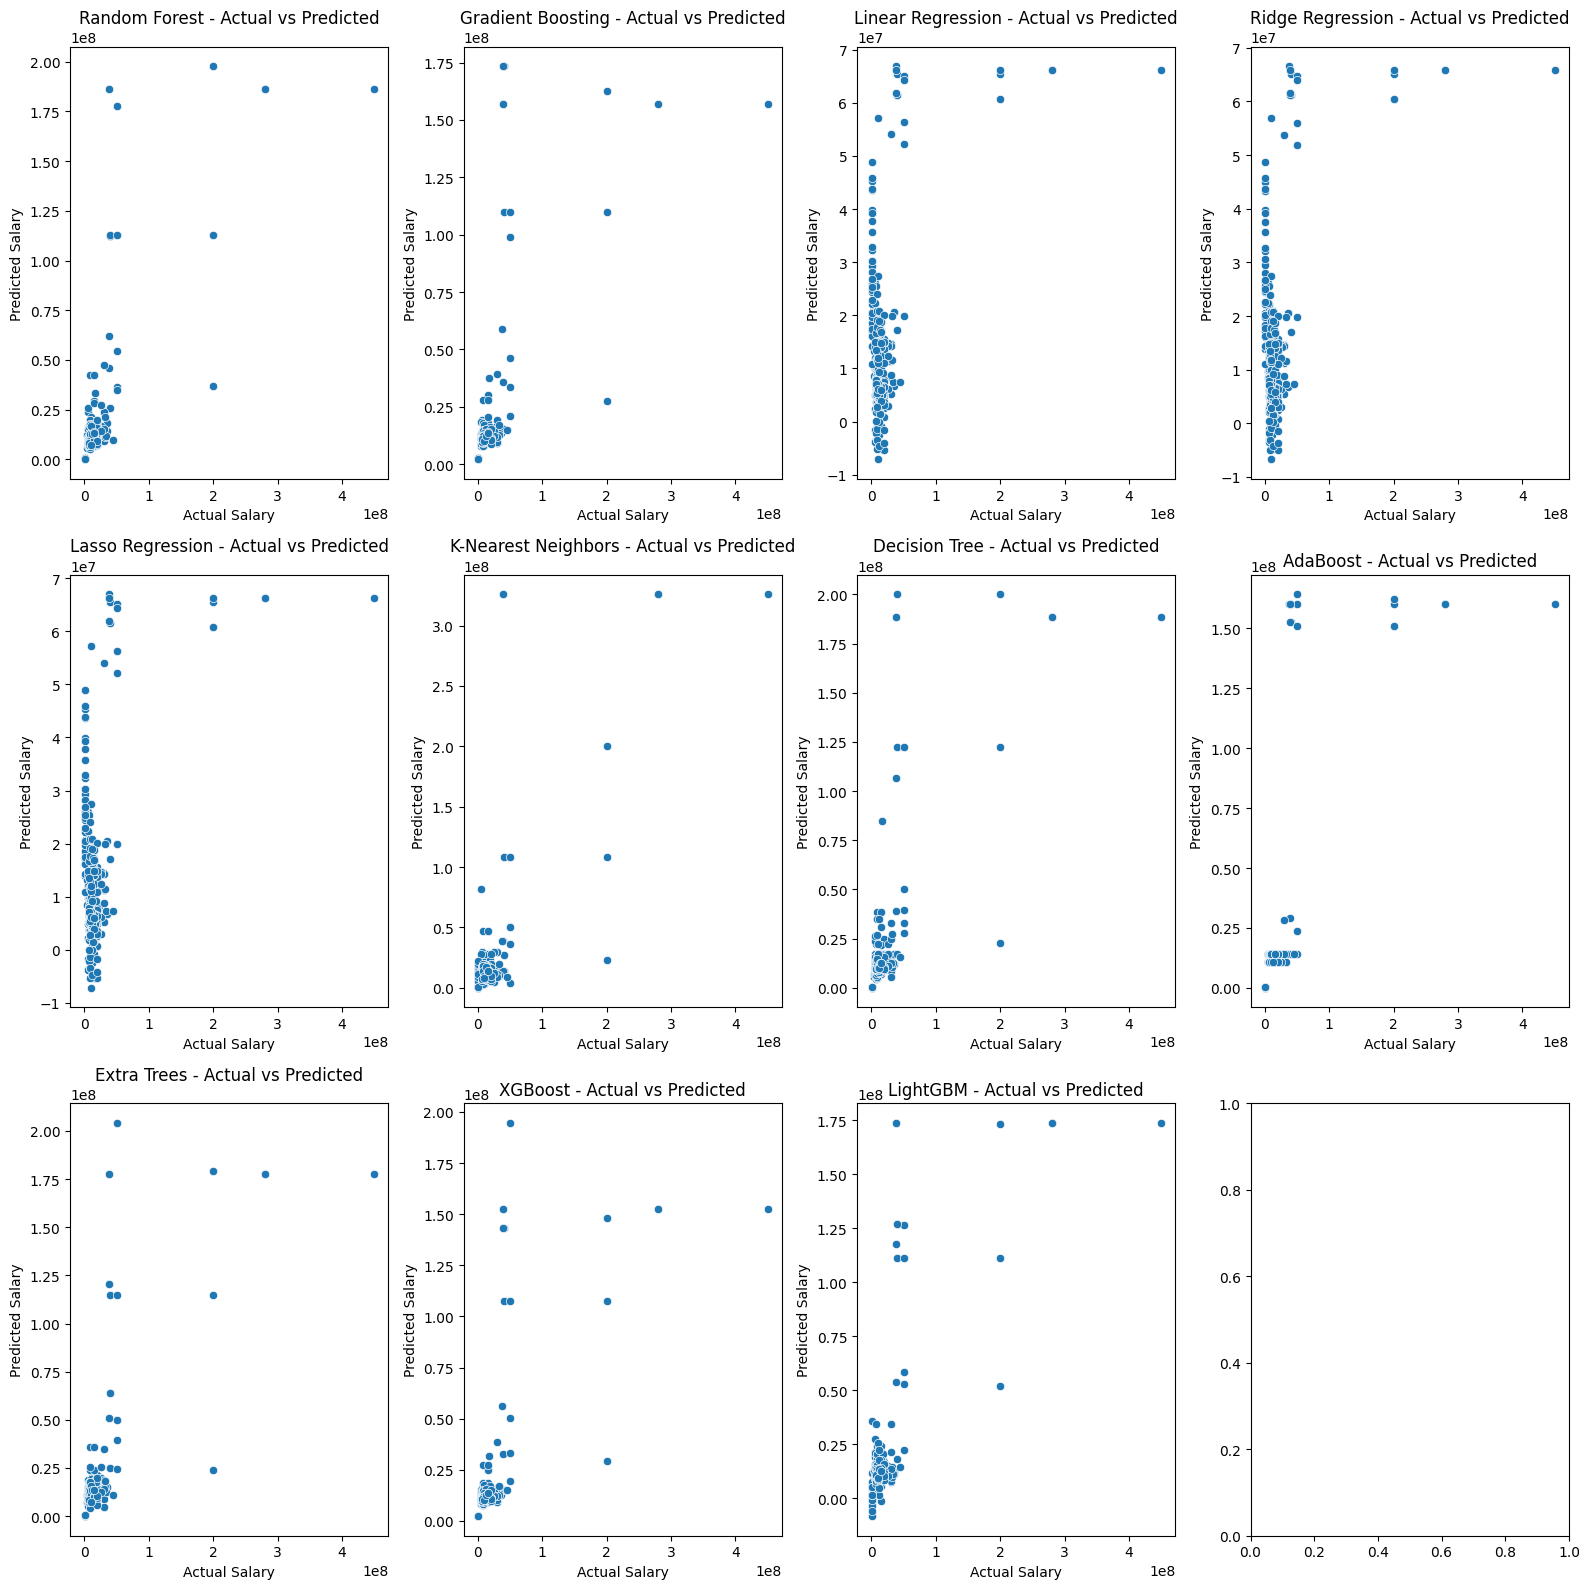

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    'Lasso Regression': {'alpha': [0.1, 1, 10], 'tol': [0.001, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_samples': [5, 10, 20]}
}


# K-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()

best_params = []
mses = []
r2s = []
model_names = []

# Grid Search và huấn luyện mô hình
for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    r2s.append(r2)

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name} - Actual vs Predicted')
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
info_model = {'Model': model_names, 'Best params': best_params, 'MSE': mses, 'R2': r2s}
info_model= pd.DataFrame(info_model)
info_model

,Model,Best params,MSE,R2
0,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",5.083549e+14,0.533987
1,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",5.727446e+14,0.474960
2,Linear Regression,{},8.459164e+14,0.224542
3,Ridge Regression,"{'alpha': 10, 'solver': 'sag'}",8.462337e+14,0.224251
4,Lasso Regression,"{'alpha': 10, 'tol': 0.01}",8.459164e+14,0.224542
5,K-Nearest Neighbors,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'we...",6.142290e+14,0.436931
6,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.026161e+14,0.447577
7,AdaBoost,"{'learning_rate': 0.01, 'n_estimators': 50}",5.908748e+14,0.458340
8,Extra Trees,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",5.345217e+14,0.510000
9,XGBoost,"{'learning_rate': 0.01, 'max_depth': 7, 'min_c...",5.896759e+14,0.459439


# Tổng + giữ cột ít ảnh hưởng

## Chuẩn bị


In [ ]:
# https://drive.google.com/file/d/172KJoD99DttjAOfKweKbsmAl9r8zNfS1/view?usp=sharing
!gdown '172KJoD99DttjAOfKweKbsmAl9r8zNfS1'

Downloading...
From: https://drive.google.com/uc?id=172KJoD99DttjAOfKweKbsmAl9r8zNfS1
To: /content/data_KNN_tong.csv
100% 1.77M/1.77M [00:00<00:00, 12.9MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('data_KNN_tong.csv')

In [ ]:
# Các biến phân loại có ảnh hưởng tới lương:
# ['location', 'companyType', 'salaryType', 'contractType',
# 'jobType', 'experience', 'gender', 'education', 'Partner']
data = data.drop(['decription', 'index'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])

In [ ]:
import numpy as np
data['Salary'].replace(to_replace='Thỏa thuận',
                       value=np.nan,
                       inplace=True)
data=data.dropna()
data['Salary'] = list(data['Salary'].astype(float))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor, RANSACRegressor, BayesianRidge, ARDRegression, OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import PoissonRegressor, TweedieRegressor, GammaRegressor


## Huấn luyện

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 13
[LightGBM] [Info] Start training from score 15409380.460015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

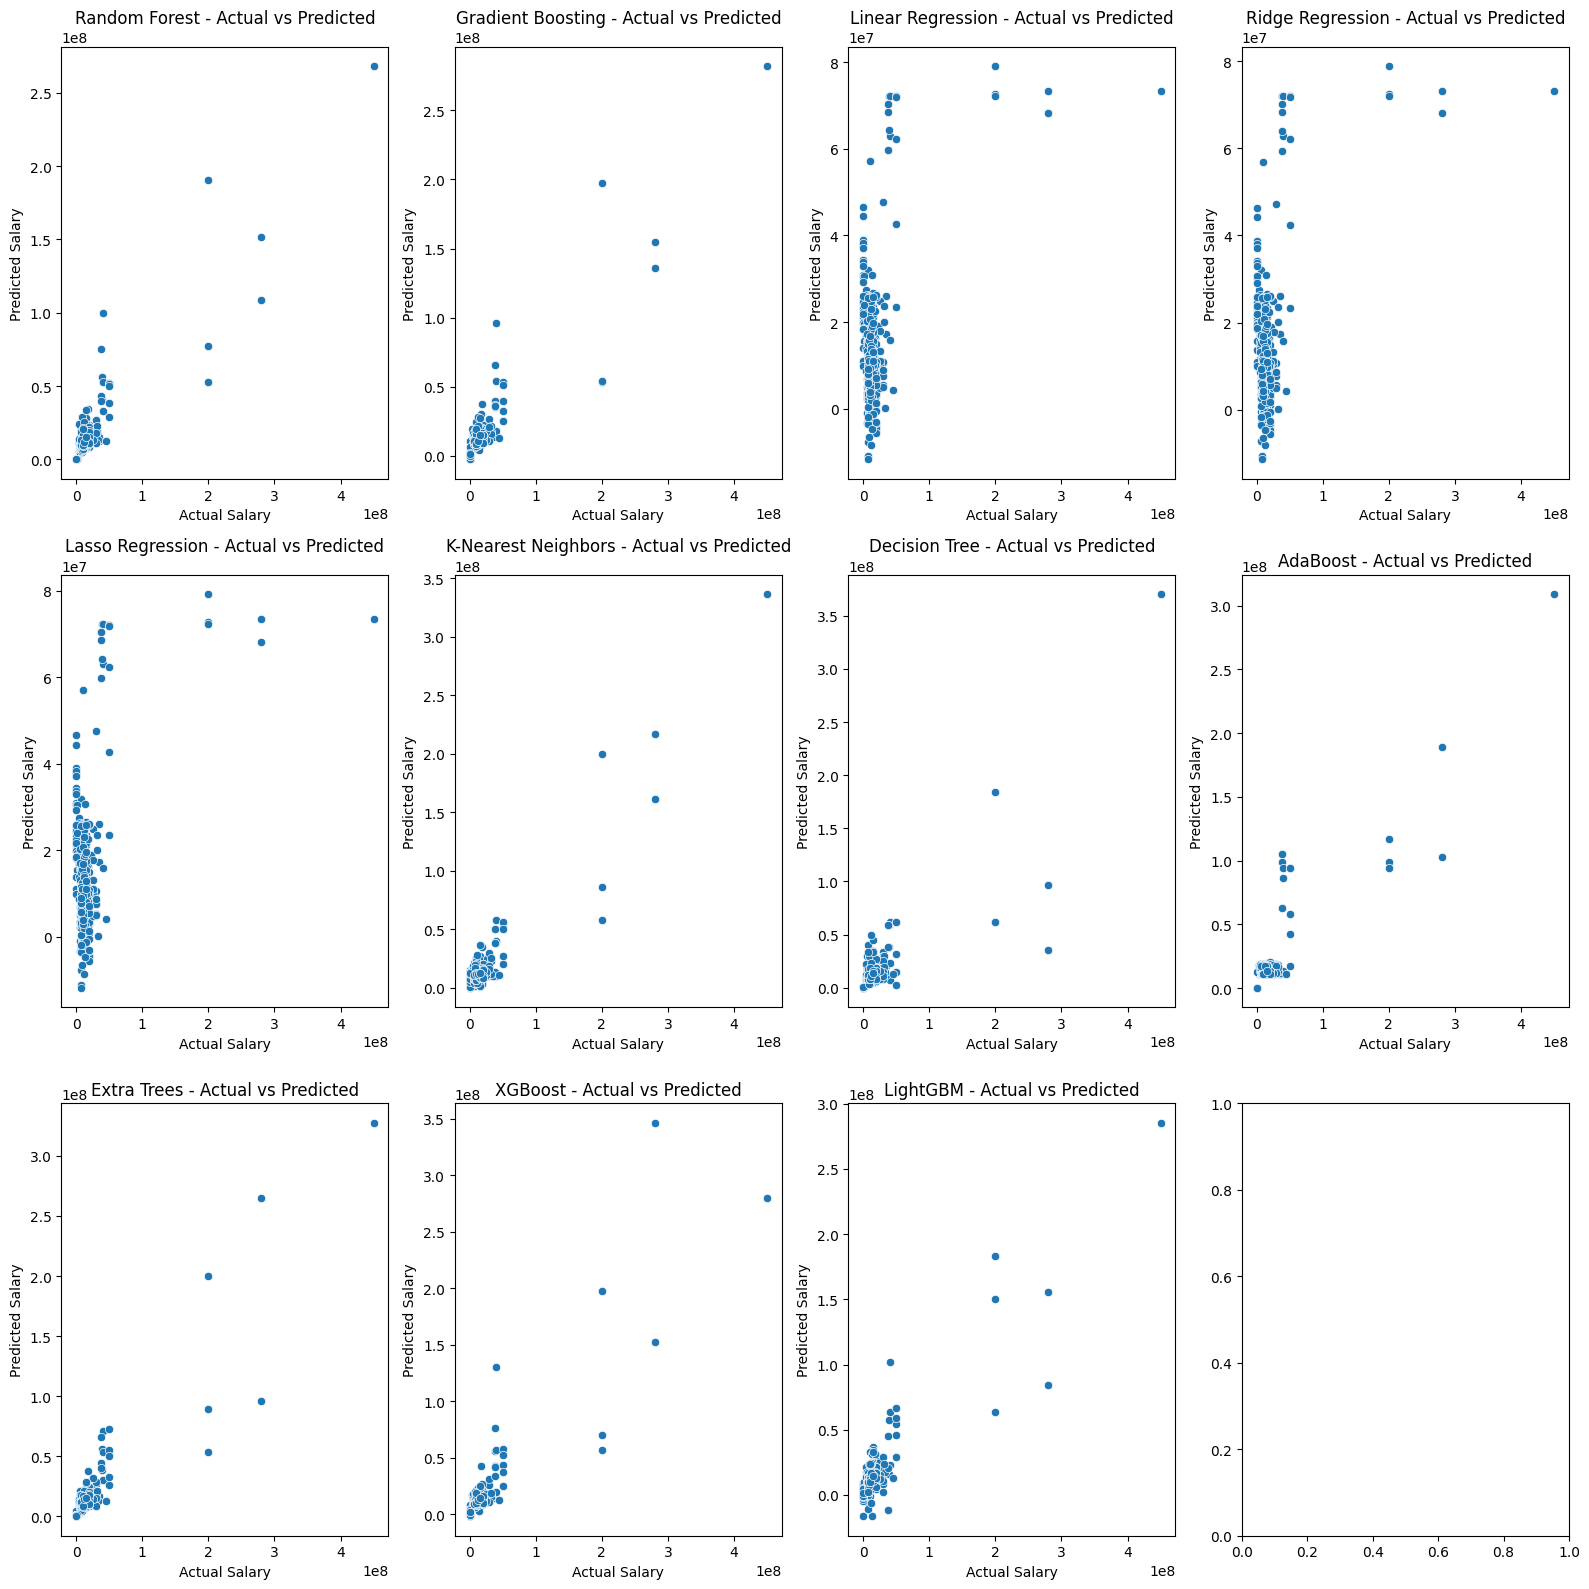

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    'Lasso Regression': {'alpha': [0.1, 1, 10], 'tol': [0.001, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_samples': [5, 10, 20]}
}


# K-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()

best_params = []
mses = []
r2s = []
model_names = []

# Grid Search và huấn luyện mô hình
for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    r2s.append(r2)

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name} - Actual vs Predicted')
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
info_model = {'Model': model_names, 'Best params': best_params, 'MSE': mses, 'R2': r2s}
info_model= pd.DataFrame(info_model)
info_model

,Model,Best params,MSE,R2
0,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",3.129034e+14,0.713159
1,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",2.912472e+14,0.733011
2,Linear Regression,{},8.185278e+14,0.249649
3,Ridge Regression,"{'alpha': 10, 'solver': 'sparse_cg'}",8.188594e+14,0.249345
4,Lasso Regression,"{'alpha': 10, 'tol': 0.1}",8.185278e+14,0.249649
5,K-Nearest Neighbors,"{'algorithm': 'brute', 'n_neighbors': 3, 'weig...",1.960520e+14,0.820278
6,Decision Tree,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",3.893534e+14,0.643077
7,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 50}",3.005320e+14,0.724500
8,Extra Trees,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",2.273316e+14,0.791603
9,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",2.565180e+14,0.764848


# Tổng hợp model


## Chuẩn bị


In [15]:
# https://drive.google.com/file/d/172KJoD99DttjAOfKweKbsmAl9r8zNfS1/view?usp=sharing
!gdown '172KJoD99DttjAOfKweKbsmAl9r8zNfS1'

Downloading...
From: https://drive.google.com/uc?id=172KJoD99DttjAOfKweKbsmAl9r8zNfS1
To: /content/data_KNN_tong.csv
100% 1.77M/1.77M [00:00<00:00, 46.6MB/s]


In [16]:
import pandas as pd

data = pd.read_csv('data_KNN_tong.csv')

In [17]:
# Các biến phân loại có ảnh hưởng tới lương:
# ['location', 'companyType', 'salaryType', 'contractType',
# 'jobType', 'experience', 'gender', 'education', 'Partner']
data = data.drop(['decription', 'index'], axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
import joblib

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])
        joblib.dump(encode, f'{column}_encoders.pkl')

In [ ]:
import numpy as np
data['Salary'].replace(to_replace='Thỏa thuận',
                       value=np.nan,
                       inplace=True)
data=data.dropna()
data['Salary'] = list(data['Salary'].astype(float))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor, RANSACRegressor, BayesianRidge, ARDRegression, OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import PoissonRegressor, TweedieRegressor, GammaRegressor


## Huấn luyện

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_model_top_2 = VotingRegressor(estimators=[
    ('K-Nearest Neighbors', KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')),
    ('Extra Tree', ExtraTreesRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50))
])
voting_model_top_3 = VotingRegressor(estimators=[
    ('K-Nearest Neighbors', KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')),
    ('Extra Tree', ExtraTreesRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)),
    ('XGboost', XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100))
])
voting_model_top_4 = VotingRegressor(estimators=[
    ('K-Nearest Neighbors', KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')),
    ('Extra Tree', ExtraTreesRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)),
    ('XGboost', XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100)),
    ('Random Forest', RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=100))
])
voting_model_top_5 = VotingRegressor(estimators=[
    ('K-Nearest Neighbors', KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')),
    ('Extra Tree', ExtraTreesRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)),
    ('XGboost', XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100)),
    ('Random Forest', RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100))
])

Mean Squared Error: 199950070201202.97, R-squared: 0.8167041483233


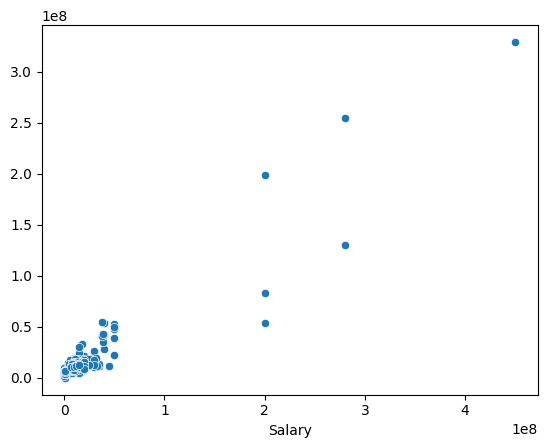

In [ ]:
voting_model_top_2.fit(X_train, y_train)

predictions = voting_model_top_2.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
sns.scatterplot(x=y_test, y=predictions)
axs[i].set_title(f'{voting_model_top_2} - Actual vs Predicted')
axs[i].set_xlabel('Actual Salary')
axs[i].set_ylabel('Predicted Salary')

plt.show()

Mean Squared Error: 180149196141228.97, R-squared: 0.8348557702312785


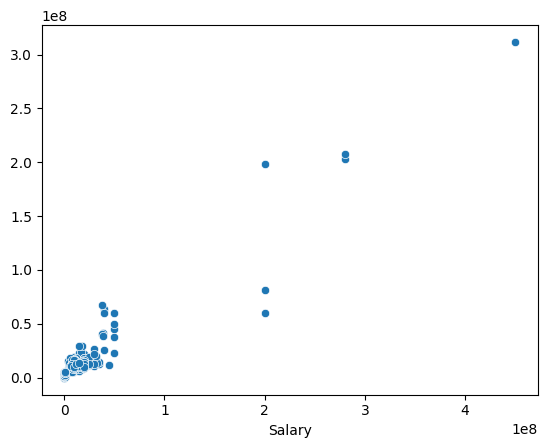

In [ ]:
voting_model_top_3.fit(X_train, y_train)

predictions = voting_model_top_3.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
sns.scatterplot(x=y_test, y=predictions)
axs[i].set_title(f'{voting_model_top_3} - Actual vs Predicted')
axs[i].set_xlabel('Actual Salary')
axs[i].set_ylabel('Predicted Salary')

plt.show()

Mean Squared Error: 197801220446560.22, R-squared: 0.8186740163283783


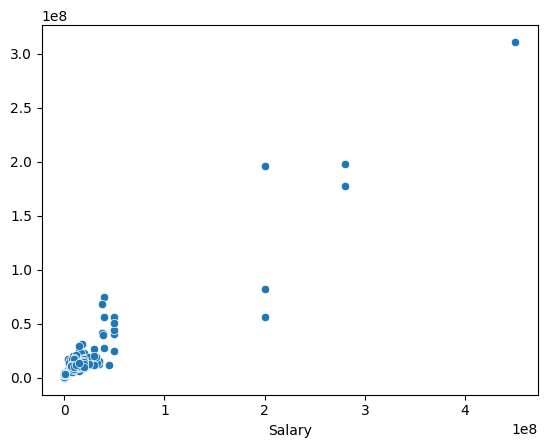

In [ ]:
voting_model_top_4.fit(X_train, y_train)

predictions = voting_model_top_4.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
sns.scatterplot(x=y_test, y=predictions)
axs[i].set_title(f'{voting_model_top_4} - Actual vs Predicted')
axs[i].set_xlabel('Actual Salary')
axs[i].set_ylabel('Predicted Salary')

plt.show()

Mean Squared Error: 216742974769019.6, R-squared: 0.8013099564543692


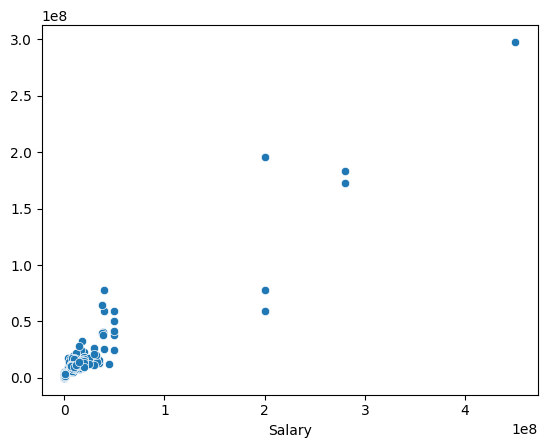

In [ ]:
voting_model_top_5.fit(X_train, y_train)

predictions = voting_model_top_5.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
sns.scatterplot(x=y_test, y=predictions)
axs[i].set_title(f'{voting_model_top_5} - Actual vs Predicted')
axs[i].set_xlabel('Actual Salary')
axs[i].set_ylabel('Predicted Salary')

plt.show()

# Lưu mô hình


In [ ]:
import joblib
# Lưu mô hình
joblib.dump(voting_model_top_3, 'voting_model_top_3.pkl')

['voting_model_top_3.pkl']

# Thử nghiệm dữ liệu thực tế

In [9]:
# https://drive.google.com/file/d/1gDhUkiGJq-hnUbBvaC40C61GK2mVRYoA/view?usp=sharing
!gdown '1gDhUkiGJq-hnUbBvaC40C61GK2mVRYoA'
# https://drive.google.com/file/d/172KJoD99DttjAOfKweKbsmAl9r8zNfS1/view?usp=sharing
!gdown '172KJoD99DttjAOfKweKbsmAl9r8zNfS1'
# https://drive.google.com/file/d/1Vbe0BVXt7fM_FTCPcdpmtGByS8Y1q2-0/view?usp=sharing
!gdown '1Vbe0BVXt7fM_FTCPcdpmtGByS8Y1q2-0'

Downloading...
From: https://drive.google.com/uc?id=1gDhUkiGJq-hnUbBvaC40C61GK2mVRYoA
To: /content/KNN_imputer_tong.pkl
100% 251k/251k [00:00<00:00, 17.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=172KJoD99DttjAOfKweKbsmAl9r8zNfS1
To: /content/data_KNN_tong.csv
100% 1.77M/1.77M [00:00<00:00, 46.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vbe0BVXt7fM_FTCPcdpmtGByS8Y1q2-0
To: /content/voting_model_top_3.pkl
100% 1.74M/1.74M [00:00<00:00, 47.6MB/s]


In [20]:
import pandas as pd
data = pd.read_csv('data_KNN_tong.csv')

In [10]:
# Tải mô hình lên
import joblib
loaded_model = joblib.load('voting_model_top_3.pkl')

In [4]:
def encode_value(sample):
  list_null = ['', '.', '?', '-', '_', 'NONE', 'NULL', 'Not', '|']
  # Thay thế các giá trị null bằng np.nan
  sample.replace(to_replace=list_null, value=np.nan, inplace=True)
  sample['vacacies'] = sample['vacacies'].astype(int)
  sample['minAge'] = sample['minAge'].astype(int)
  sample['maxAge'] = sample['maxAge'].astype(int)
  bien_phan_loai = sample.select_dtypes(['object']).columns
  for column in bien_phan_loai:
      if column != 'Salary' and sample[column][0] != np.nan:
          encode = joblib.load(f'{column}_encoders.pkl')
          sample[column] = encode.transform(sample[column])
  return sample

In [5]:
def knn_imputer(sample):
    imputer = joblib.load('KNN_imputer_tong.pkl')
    sample = imputer.transform(sample)
    return sample

In [21]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact_manual
import numpy as np
def create_dropdown(options, description):
    return widgets.Dropdown(options=options, description=description)

# Create widgets for each field
widget_dict = {
    'location': 'Location',
    'companyType': 'Company Type',
    'salaryType': 'Salary Type',
    'contractType': 'Contract Type',
    'jobType': 'Job Type',
    'experience': 'Experience',
    'gender': 'Gender',
    'vacacies': 'Vacancies',
    'education': 'Education',
    'minAge': 'Min Age',
    'maxAge': 'Max Age',
    'skill': 'Skill',
    'Partner': 'Partner'
}

widgets_dict = {key: create_dropdown(data[key].unique(), value) for key, value in widget_dict.items()}

# Display widgets
display(*widgets_dict.values())

# Function to handle manual interaction
@interact_manual
def capture_values():

    selected_values = {key: widget.value for key, widget in widgets_dict.items()}

    new_sample = pd.DataFrame({**selected_values, 'Salary': [0]})

    # Further processing (encoding, imputing, prediction)
    new_sample = encode_value(new_sample)
    new_sample = new_sample.drop('Salary', axis=1)
    # new_sample = knn_imputer(new_sample)

    # Predict salary
    predicted_salary = int(loaded_model.predict(new_sample)[0])
    formatted_salary = '{:,.0f}'.format(predicted_salary)

    # Get the salary type from the selected values
    salary_type = selected_values.get('salaryType', 'unknown')

    # Display the predicted salary with formatted output
    print(f"Predicted salary: {formatted_salary} VND/{salary_type[5:]}")


Dropdown(description='Location', options=('Tp Hồ Chí Minh', 'Hà Nội', 'Bình Dương', 'An Giang', 'Đồng Nai', 'C…

Dropdown(description='Company Type', options=('Công ty', 'Cá nhân'), value='Công ty')

Dropdown(description='Salary Type', options=('Theo tháng', 'Theo ngày', 'Lương khoán', 'Theo giờ'), value='The…

Dropdown(description='Contract Type', options=('Bán thời gian', 'Toàn thời gian', 'Thời vụ', 'Khác', 'Làm theo…

Dropdown(description='Job Type', options=('Tài xế giao hàng xe máy', 'Nhân viên kinh doanh', 'Nhân viên kho vậ…

Dropdown(description='Experience', options=('Không yêu cầu', '3-5 năm', '1-2 năm', '< 1 năm', '> 10 năm', '6-1…

Dropdown(description='Gender', options=('Không yêu cầu', 'Nam', 'Nữ'), value='Không yêu cầu')

Dropdown(description='Vacancies', options=(50.0, 5.0, 2.0, 10.0, 20.0, 8.0, 15.0, 90.0, 9.0, 100.0, 3.0, 150.0…

Dropdown(description='Education', options=('Khác', 'Trung cấp/Nghề', 'Cấp 3', 'Không yêu cầu', 'Cấp 2', 'Cao đ…

Dropdown(description='Min Age', options=(18.0, 22.0, 20.0, 25.0, 23.0, 24.0, 21.0, 26.0, 19.0, 30.0, 31.0, 28.…

Dropdown(description='Max Age', options=(55, 40, 35, 48, 33, 45, 42, 58, 60, 30, 50, 38, 47, 37, 32, 39, 28, 2…

Dropdown(description='Skill', options=('Không', 'Có'), value='Không')

Dropdown(description='Partner', options=('Có', 'Không'), value='Có')

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…